In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In this project, N is the number of time steps, M is the number of of path generated for the Brownian motion. For example, you could take N = 100 and M = 10, 000.

## (1) Brownian motion and Black Scholes model

#### (1.1) Brownian motion

(1.1.1) By using the rescaled random walk, build a program which give a path of a Brownian motion on [0, 1] with a time subdivision t_i = $\frac{i}{N}$ , 0 $\leq$ i $\leq$ N 

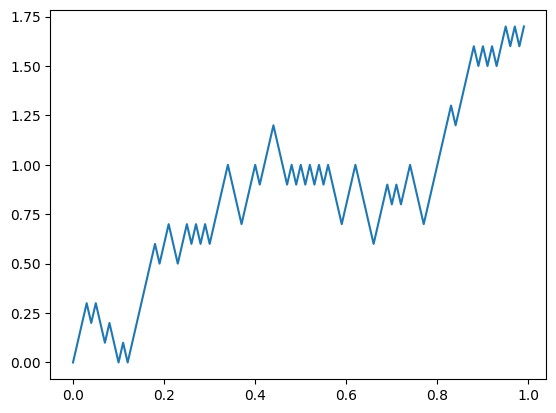

In [5]:
N = 100
np.random.seed(54321)

def walk(N):
    walks = np.random.rand(N)>0.5
    W = np.zeros(N+1)
    for i in range(len(walks)):
        # +1 if the value is > 0.5 else -1
        if walks[i]: W[i+1] = W[i] + 1
        else: W[i+1] = W[i] - 1
    # scale the term
    W = W/np.sqrt(N)
    x_axis = np.arange(0, 1, 1/N)
    np.append(x_axis, 1)
    return x_axis, W

x_axis, W = walk(N)
plt.plot(x_axis, W[:-1])

(1.1.2) Generate M path of a Brownian motion, prove numerically that E[$W_t$] = 0 and Var($W_t$) = t for different values of t.

In [87]:
N = 100
M = 10000
np.random.seed(54321)

walks = []
for i in range(M):
    # generate simple random walk
    _, cur_W = walk(N)
    walks.append(cur_W[:-1])

walks = np.array(walks)

In [8]:
# value of E[Wt] at random indices
np.mean(walks[:, [i for i in range(0, N, 13)]], axis=0)

# we can see that the mean at random indices are close to 0.

array([ 0.     , -0.00288, -0.00332,  0.00092,  0.00146, -0.0007 ,
        0.00318,  0.00126])

In [9]:
# absolute difference between var(Wt) and t at random indices

np.abs(np.var(walks[:, [i for i in range(10)]], axis=0) \
    - np.arange(0, 1, 1/N)[:10])

# again, we show that the variance at random indices i is very close to i itself.

array([0.000000e+00, 2.916000e-07, 3.501504e-04, 1.142500e-04,
       7.078400e-06, 5.602916e-04, 7.138496e-04, 1.759600e-04,
       1.057424e-04, 9.961584e-04])

(1.1.3) Compute numerically $[W, W]_t$ and observe that $[W, W]_t$ = t for some value of t.

In [55]:
ts = np.arange(0.1, 1.1, 0.2) # choose t as some random value between 0 and 1
qvs_mean, qvs_std = [], []
for t in ts:
    steps = int(t * N)
    # limit the walks range for each t and calculate the mean/variance
    qvs_mean.append(np.mean(np.sum(np.diff(walks[:, :steps+1])**2, axis=1)))
    qvs_std.append(round(np.std(np.sum(np.diff(walks[:, :steps+1])**2, axis=1)), 5))

qvs_mean, qvs_std, ts

# the result shows that the quadratic variation at time t will just be t, 
# and the variance of the quadratic variation is very close to 0.

([0.10000000000000003, 0.30000000000000004, 0.5, 0.7, 0.9000000000000004],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 array([0.1, 0.3, 0.5, 0.7, 0.9]))

#### (1.2) Stochastic integral

In this section we are studying

$$
    I = \int_0^1W_sdW_s
$$

We propose two schemes to approach numerically I on each path w $\in \Omega$:

$$
    I^-(w) = \sum_{i = 0}^NW_{t_{i+1}}(w)(W_{t{i+1}}(w) - W_{t_{i}}(w))
$$

or 

$$
    I_-(w) = \sum_{i = 0}^NW_{t_{i}}(w)(W_{t_{i+1}}(w) - W_{t_{i}}(w))
$$

(1.2.1) Observe numerically that $I^-=\frac{1}{2}W_1^2 + \frac{1}{2}$ almost surely

In [90]:
I_upper = np.mean(np.sum((np.diff(walks) * walks[:, 1:]), axis=1))
theoretical_val = 0.5 * np.mean(walks[:, -1]**2) + 0.5

I_upper, theoretical_val

(0.9919377777777775, 0.9936044444444444)

(1.2.2) Observe numerically that $I_-=\frac{1}{2}W_1^2 - \frac{1}{2}$ almost surely

In [93]:
I_lower = np.mean(np.sum((np.diff(walks) * walks[:, :-1]), axis=1))
theoretical_val = 0.5 * np.mean(walks[:, -1]**2) - 0.5

I_lower, theoretical_val

(-0.0047288888888888814, -0.006395555555555599)

(1.2.3) Which definition of I do we keep in view of Ito’s formula applied to $W^2_1$?

(1.2.4) Compute numerically $E[I]$ and $E[I^2]$ for the choice of I made in question 3. and compare with the theoretical values.

In [100]:
# the theoretical expectation is 0 and variance is 1/2.
simulated_expectation = 0.5 * np.mean(walks[:, -1]**2) - 0.5
simulated_variance = 0.25 * np.std(walks[:, -1]**2)**2 + simulated_expectation**2

simulated_expectation, simulated_variance

(-0.006395555555555599, 0.49803366962962936)

## 2 Black-Scholes v.s. Bachelier